# TAREA N°2

Después que empezara la campaña de vacunación, a alguien se le ocurrió decir que había una correlación entre el número de vacunados y las comunas más ricas. Se le olvidó chequear, por supuesto, que la gente de más edad tiende a tener más ingresos.

Su tarea es mostrar y explicar, en dos gráficos, como se correlacionan las vacunas con 1) el estrato socio-económico de las comunas, y 2) el edad promedio de las comunas (en los grupos censales: 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS'). Sólo utilice las comunas de la Region Metropolitana. Finalmente: puede ser que el efecto de que las comunas más ricas se vacunaron primero son las que tienen mayor promedio de edad?

Para medir riqueza de la comuna, utilice: https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv (Enlaces a un sitio externo).

Para medir poblacion utilice: https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv (Enlaces a un sitio externo).

Para medir vacunación, tiene buscar los datos en el github del Ministerio de Ciencia.



In [118]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sb


In [34]:
hdi = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')
pob = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv')
vac = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_2daDosis.csv')

# Pre-proceso y limpieza de datos

In [35]:
hdi

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015
5,13106,0.790810,0.784378,0.729145,0.735,0.767604
6,13107,0.726330,0.775631,0.641707,0.737,0.712375
7,13108,0.821551,0.751105,0.722493,0.709,0.763935
8,13109,0.856570,0.835740,0.860235,0.775,0.850780
9,13110,0.773094,0.824255,0.791155,0.804,0.795888


Se verifica si exiten variables con valores NaN ademas de idh.

In [36]:
hdi.isna().any()

comuna    False
LEI       False
II        False
EI        False
idh        True
HDI       False
dtype: bool

Solo la variable idh posee valores NaN. 
Para solucionar esto se reemplazaran por la media, de manera que no se elimine ninguna comuna.

In [37]:
hdi = hdi.replace(numpy.nan, hdi['idh'].mean())

In [38]:
hdi.dtypes

comuna      int64
LEI       float64
II        float64
EI        float64
idh       float64
HDI       float64
dtype: object

In [39]:
pob

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7
...,...,...,...,...,...
180494,15202,*,*,6,4
180495,15202,0,0,0,0
180496,15202,0,0,0,0
180497,15202,*,0,9,*


In [40]:
pob.isna().any()

COMUNA         False
EDAD_0A5       False
EDAD_6A14      False
EDAD_15A64     False
EDAD_65YMAS    False
dtype: bool

In [41]:
pob2 = pob.replace('*', 0)
pob2

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,0,0,54,10
2,1101,0,0,28,0
3,1101,0,7,49,0
4,1101,0,0,26,7
...,...,...,...,...,...
180494,15202,0,0,6,4
180495,15202,0,0,0,0
180496,15202,0,0,0,0
180497,15202,0,0,9,0


In [42]:
pob2.dtypes

COMUNA          int64
EDAD_0A5       object
EDAD_6A14      object
EDAD_15A64     object
EDAD_65YMAS    object
dtype: object

Se debera:

1.- Cambiar el tipo de variable de object a int.

2.- Juntar los datos que pertenezcan a una misma comuna, y asi obtener la poblacion total.

In [43]:
for columna in pob2:
    if columna != 'COMUNA':
        pob2[columna] = pob2[columna].astype('int64')

In [44]:
pob2.dtypes

COMUNA         int64
EDAD_0A5       int64
EDAD_6A14      int64
EDAD_15A64     int64
EDAD_65YMAS    int64
dtype: object

In [45]:
pob_agrupados = pob2.groupby('COMUNA').sum()
pob_agrupados

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
COMUNA,,,,
1101,15490,22691,132629,16895
1107,10105,17365,72866,3908
1401,899,1786,9446,864
1402,73,134,772,136
1403,75,111,1246,148
...,...,...,...,...
14204,1433,2829,19778,3939
15101,16125,26165,148234,22224
15102,36,74,728,154


Ahora se tiene la poblacion total de cada comuna, diferenciada por rango etario.

Se puede observar que el total de comunas de la base de datos pob sera igual a las reales; 346 comunas.

Por otra parte, el total de  de comunas de la base de datos hdi sera 51 y todos sus codigos comenzaran con 13, por esto podemos concluir que los resultados del analisis final seran solo aplicables a la region metropolitana.

Se procedera a unir las bases de datos para facilitar su estudio.

In [46]:
hdi2 = hdi.rename(columns = {'comuna':'COMUNA'})
union = pd.merge(pob_agrupados, hdi2, on='COMUNA')
union.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,LEI,II,EI,idh,HDI
0,13101,22618,23769,323893,28936,0.791672,0.873137,0.924099,0.807000,0.861222
1,13102,5907,8703,53650,9273,0.782817,0.800343,0.713499,0.743000,0.764616
2,13103,9719,14745,89915,16011,0.752447,0.750382,0.657961,0.683000,0.718874
3,13104,8730,12629,85791,16819,0.784872,0.760697,0.705426,0.707000,0.749584
4,13105,12071,18633,109501,19321,0.777236,0.780019,0.673876,0.711000,0.742015
5,13106,9422,12110,105479,16724,0.790810,0.784378,0.729145,0.735000,0.767604
6,13107,8465,13508,66093,9016,0.726330,0.775631,0.641707,0.737000,0.712375
7,13108,7195,8357,72314,10749,0.821551,0.751105,0.722493,0.709000,0.763935
8,13109,6162,8953,61118,12715,0.856570,0.835740,0.860235,0.775000,0.850780
9,13110,24131,37044,251149,45185,0.773094,0.824255,0.791155,0.804000,0.795888


In [48]:
vac

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,889.0,577.0,191.0,1.0,619.0,1054.0,1349.0,1513.0,1508.0,458.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,0.0,0.0,2.0,3.0,16.0,5.0,3.0,1.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,2.0,0.0,7.0,4.0,3.0,5.0,7.0,1.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [51]:
vac.dtypes

Region            object
Codigo region      int64
Comuna            object
Codigo comuna    float64
Poblacion        float64
                  ...   
2021-07-06       float64
2021-07-07       float64
2021-07-08       float64
2021-07-09       float64
2021-07-10       float64
Length: 204, dtype: object

In [56]:
vac2 = vac[vac['Codigo region'] == 13]
vac2.head()
    

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,120.0,104.0,1.0,0.0,79.0,71.0,66.0,52.0,61.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,432.0,232.0,143.0,1.0,383.0,460.0,514.0,638.0,433.0,10.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,122.0,75.0,9.0,2.0,129.0,73.0,112.0,133.0,123.0,9.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,360.0,197.0,117.0,6.0,202.0,242.0,354.0,365.0,190.0,161.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,577.0,365.0,384.0,30.0,441.0,454.0,485.0,505.0,499.0,304.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,568.0,555.0,10.0,3.0,615.0,496.0,522.0,684.0,649.0,18.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,651.0,348.0,141.0,0.0,311.0,303.0,398.0,550.0,570.0,234.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,94.0,81.0,1.0,0.0,65.0,93.0,87.0,90.0,152.0,1.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,430.0,220.0,117.0,5.0,556.0,523.0,698.0,892.0,568.0,166.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,102.0,58.0,105.0,0.0,140.0,100.0,106.0,124.0,146.0,52.0


In [81]:
vac3 = vac2.dropna().copy()
vac3['Vacunados'] = vac3.iloc[:, 6:-1].sum(axis = 1)
vac_final = vac3[['Codigo comuna', 'Poblacion', 'Vacunados']].sort_values(['Codigo comuna']).copy()
vac_final.head()

,Codigo comuna,Poblacion,Vacunados
136,13101.0,503147.0,258787.0
91,13102.0,88956.0,42566.0
92,13103.0,142465.0,59730.0
94,13104.0,139195.0,78435.0
96,13105.0,172000.0,80850.0
98,13106.0,206792.0,81003.0
99,13107.0,112528.0,69778.0
100,13108.0,142065.0,79262.0
102,13109.0,100434.0,52383.0
103,13110.0,402433.0,237855.0


In [70]:
vac_final.dtypes

Codigo comuna    float64
Poblacion        float64
Vacunados        float64
dtype: object

In [86]:
for i in vac_final:
    vac_final[i] = vac_final[i].astype('int64')
vac_final.dtypes

Codigo comuna    int64
Poblacion        int64
Vacunados        int64
dtype: object

In [87]:
vac_final.head()

,Codigo comuna,Poblacion,Vacunados
136,13101,503147,258787
91,13102,88956,42566
92,13103,142465,59730
94,13104,139195,78435
96,13105,172000,80850


In [88]:
union.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,LEI,II,EI,idh,HDI
0,13101,22618,23769,323893,28936,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,5907,8703,53650,9273,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,9719,14745,89915,16011,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,8730,12629,85791,16819,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,12071,18633,109501,19321,0.777236,0.780019,0.673876,0.711,0.742015


In [89]:
union2 = union.copy()
union2['Poblacion'] = union2.iloc[:, 2: 4].sum(axis = 1)
union2[['COMUNA', 'Poblacion', 'HDI']].head()

,COMUNA,Poblacion,HDI
0,13101,347662,0.861222
1,13102,62353,0.764616
2,13103,104660,0.718874
3,13104,98420,0.749584
4,13105,128134,0.742015


A primera vista, se puede observar como la poblacion de union2 sera menor a la de vac_final, probablemente debido a los * reemplazados por 0.

In [96]:
vac_final['Poblacion'].sum() - union2['Poblacion'].sum()

2412090

Por esto se hara uso de la poblacion entregada por union2, dado que esta surge de los rangos etarios que seran utilizados mas adelante.

# Análisis de correlación

In [100]:
vac_final2 = vac_final.rename(columns = {'Codigo comuna':'COMUNA'})
master = pd.merge(union2, vac_final2, on='COMUNA')[['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS', 'Poblacion_x', 'HDI', 'Vacunados']]
master.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,Poblacion_x,HDI,Vacunados
0,13101,22618,23769,323893,28936,347662,0.861222,258787
1,13102,5907,8703,53650,9273,62353,0.764616,42566
2,13103,9719,14745,89915,16011,104660,0.718874,59730
3,13104,8730,12629,85791,16819,98420,0.749584,78435
4,13105,12071,18633,109501,19321,128134,0.742015,80850


In [115]:
master_matriz = master.iloc[:, 1: -1]
master_matriz.head()

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,Poblacion_x,HDI,Vacunados
0,22618,23769,323893,28936,347662,0.861222,258787
1,5907,8703,53650,9273,62353,0.764616,42566
2,9719,14745,89915,16011,104660,0.718874,59730
3,8730,12629,85791,16819,98420,0.749584,78435
4,12071,18633,109501,19321,128134,0.742015,80850


In [116]:
matriz = master_matriz.corr()
matriz

,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,Poblacion_x,HDI,Vacunados
EDAD_0A5,1.000000,0.981161,0.975972,0.852984,0.984153,0.082257,0.863138
EDAD_6A14,0.981161,1.000000,0.934106,0.790712,0.950083,-0.001124,0.786395
EDAD_15A64,0.975972,0.934106,1.000000,0.885202,0.998860,0.183115,0.919614
EDAD_65YMAS,0.852984,0.790712,0.885202,1.000000,0.879358,0.399728,0.938327
Poblacion_x,0.984153,0.950083,0.998860,0.879358,1.000000,0.159884,0.908855
HDI,0.082257,-0.001124,0.183115,0.399728,0.159884,1.000000,0.477586
Vacunados,0.863138,0.786395,0.919614,0.938327,0.908855,0.477586,1.000000


Se ha llegado la matriz de correlacion final del analisis, de la cual se puede visualizar:

1.- Existe una correlacion positiva entre Vacunados y HDI, lo cual indica que aquellas comunas con un mayor indice (las mas ricas) presentaran un mayor numero de vacunados.

2.- Existe una gran correlacion positiva entre el numero de habitantes de una comuna y el numero de vacunados (claramente mientras mas habitantes posea un comuna mayor sera la cantidad de vacunas utilizara).

3.- Existe una gran correlacion positiva entre el numero de habitantes pertenecientes a la tercera edad de una comuna y el numero de vacunados. Esta sera la correlacion mas alta (muy cercana a 1, por lo que incluso se podria catalogar como una variable redundante), lo que confirma que la variable que mejor permitira predecir el numero de vacunados de una comuna sera su numero de habitantes pertenecientes a la tercera edad, no su indice HDI.

Cabe destacar como la correlacion entre el numero de habitantes pertenecientes a la tercera edad y el indice HDI de una comuna posee un valor positivo y significante, lo cual indica que a medida que una comuna tenga una mayor cantidad de habitantes pertenecientes a este rango etario, mayor sera su HDI esperado.

# Elaboración de gráficos

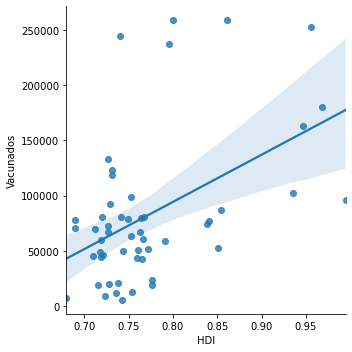

In [120]:
sb.lmplot('HDI', 'Vacunados', data=master)

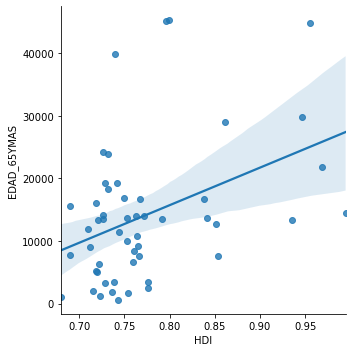

In [125]:
sb.lmplot('HDI', 'EDAD_65YMAS', data=master)

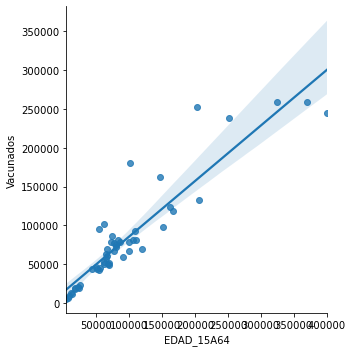

In [121]:
sb.lmplot('EDAD_15A64', 'Vacunados', data=master)

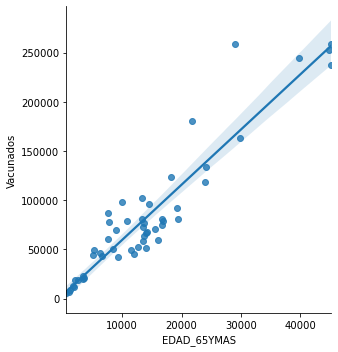

In [122]:
sb.lmplot('EDAD_65YMAS', 'Vacunados', data=master)

En conclusion, si bien es correcta la hipotesis de inicial (cuanto mayor sea el HDI mayor sera el numero de vacunados), el HDI no sera la variable que mejor permitira especular cuantos vacunados posee una vacuna, si no que este rol le quedara mejor a EDAD_65YMAS (poblacion perteneciente a la 3ra edad). Pero entonces ¿Por que existe esta correlacion positiva entre el indice HDI y el numero de vacunados?. Esto puede ser explicado por una multitud de factores, pero los mas importantes seran:

1.- Al analizar los rangos etarios y su correlacion con la variable HDI, se puede observar como aquellos pertenecientes al rango de la 3ra edad poseen la correlacion mas alta (ademas de poder visualizar un incremento a medida que el rango es mas alto), por lo que se puede concluir que a medida que la gente va añadiendo años a su vida, de igual manera va añadiendo riqueza.

2.- Si ahora hacemos uso de esta informacion, y lo aplicamos al plan de vacunacion Chileno, claramente aquellas comunas que posean un mayor numero de habitantes pertenecientes a la 3ra edad tendran un mayor numero de vacunados al comienzo de este proceso, y por ende se podra decir que las comunas que tienen un mayor numero de vacunados tendran un mayor indice de desarrollo social. Esto sera correcto, pero hay que tener cuidado con definir correlacion como causa, son cosas distintas, por lo que decir que la razon que dictaminara cuales comunas tendran un mayor numero de vacunados sera su HDI es incorrecto, basta con mirar las graficas para observar la similitud entre la grafica 1 y 2, y que la variable que tendra una relacion mas fuerte con el numero de vacunados sera EDAD_65YMAS.
